#Predviđadnje raka dojke 

##Biblioteke

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

### O korištenim bibliotekama

Sve importane biblioteke obično se koriste u analizi podataka i vizualizaciji.
* **Pandas** je biblioteka u Pythonu koja se široko koristi za manipulaciju i analizu podataka. Pruža strukture podataka kao što su serije (1-dimenzionalne) i DataFrame (2-dimenzionalne) koje nam omogućuju jednostavno rukovanje i analizu podataka. Funkcije pd.read_* omogućuju nam jednostavno čitanje različitih vrsta podataka, kao što su CSV ili Excel datoteke, u DataFrame. Metode df.head() ili df.tail() omogućuju nam da brzo pregledamo prvih, odnosno zadnjih nekoliko redaka DataFramea. Osim toga, nudi široku paletu opcija sređivanja i čišćenja podataka kao što su spajanje, grupiranje, rukovanje podacima koji nedostaju itd.

* **NumPy** je biblioteka za znanstveno računalstvo u Pythonu koja pruža podršku za velike, višedimenzionalne nizove i matrice numeričkih podataka, kao i veliku zbirku matematičkih funkcija za rad s tim nizovima. Često se koristi kao ovisnost za druge biblioteke kao što je pandas.

* **Seaborn** je biblioteka za vizualizaciju statističkih podataka izgrađena na temelju matplotliba. Omogućuje sučelje visoke razine za stvaranje atraktivne i informativne statističke grafike. Često se koristi za stvaranje informativnih vizualizacija statističkih podataka.

* **Matplotlib** je biblioteka za crtanje za programski jezik Python i njegovo numeričko matematičko proširenje NumPy. Omogućuje objektno orijentirani API za ugrađivanje crteža u aplikacije pomoću GUI alata opće namjene kao što su Tkinter, wxPython, Qt ili GTK. To je temelj mnogih drugih biblioteka crtanja, kao što su seaborn i pandas.


> **scikit-learn** (često se naziva sklearn) moćna je biblioteka za strojno učenje u Pythonu. Funkcija train_test_split dio je modula *sklearn.model_selection* koji se koristi za dijeljenje skupa podataka u dva podskupa: jedan za obuku i jedan za testiranje. Funkcija uzima nekoliko parametara, uključujući podatke koje želimo podijeliti (npr. pandas DataFrame), ciljnu varijablu koju želimo predvidjeti i veličinu testa (tj. udio podataka koje želimo koristiti za testiranje ). Prema zadanim postavkama, funkcija miješa podatke prije nego što ih podijeli, što je važno kako bi se osiguralo da skupovi za obuku i testiranje predstavljaju cjelokupni skup podataka. Funkcija vraća četiri niza: X_train, X_test, y_train, y_test koji se mogu koristiti za obuku i procjenu modela strojnog učenja.


> **LogisticRegression** je klasa u modulu *sklearn.linear_model* koja implementira logističku regresiju, što je tip generaliziranog linearnog modela (GLM) koji se koristi za probleme klasifikacije. Logistička regresija široko je korištena statistička metoda za modeliranje problema binarne i višeklasne klasifikacije. To je algoritam nadziranog učenja koji koristi logističku funkciju (poznatu i kao sigmoidna funkcija) za modeliranje vjerojatnosti pripadnosti ulazne varijable (ili skupa ulaznih varijabli) određenoj klasi. Logistička regresija je moćna metoda i poznata je po tome što daje dobre rezultate kada su ulazni podaci linearno odvojivi. Klasa LogisticRegression pruža niz parametara koji se mogu prilagoditi kako bi se poboljšala izvedba modela, kao što je snaga regularizacije (C) i solver.

> **Metrički modul** u scikit-learn (sklearn) pruža širok izbor mjera performansi za procjenu izvedbe modela strojnog učenja.Možemo koristiti mjerne podatke navedene u modulu metričkih podataka za procjenu izvedbe različitih modela i usporediti rezultate kako bismo odabrali najbolji. Na primjer, možemo koristiti metrike kao što su točnost, preciznost i mnoge druge za procjenu izvedbe modela klasifikacije. Također, sadrži mnoge druge korisne funkcije kao što su izvješće o klasifikaciji, srednja kvadratna pogreška, R-kvadrat za procjenu regresijskih modela, rezultat siluete za klasteriranje i mnoge druge.
Dobra je praksa koristiti višestruke metrike procjene kako bismo dobili sveobuhvatno razumijevanje izvedbe modela.

> **KFold** je klasa u modulu *sklearn.model_selection* koja se može koristiti za dijeljenje skupa podataka u k "grupa" za unakrsnu provjeru valjanosti. Unakrsna provjera valjanosti tehnika je za procjenu izvedbe modela strojnog učenja obukom i testiranjem na različitim podskupovima podataka. Klasa KFold uzima nekoliko parametara, uključujući broj grupa (k) i parametar "premješavanje", koji kontrolira hoće li se podaci miješati prije nego što se razdvoje u grupe. Klasa vraća iterator koji generira indekse za skupove za obuku i testiranje za svaku grupu, koji se zatim mogu koristiti za obuku i procjenu modela. Na primjer, možemo upotrijebiti klasu KFold za dijeljenje skupa podataka u 5 grupa, te trenirati i evaluirati model 5 puta, svaki put koristeći različitu grupu kao testni skup. Određivanjem prosjeka metrike izvedbe kroz svih 5 iteracija, možemo dobiti robusniju procjenu izvedbe modela.

> **RandomForestClassifier** je klasa u modulu *sklearn.ensemble* koja implementira algoritam Random Forest za klasifikaciju. Random Forest je skupna metoda koja kombinira više stabala odlučivanja kako bi se poboljšala izvedba i smanjila varijanca jednog stabla odlučivanja.
Stablo odlučivanja je struktura stabla nalik dijagramu toka gdje interni čvor predstavlja značajku (ili atribut), grana predstavlja pravilo odlučivanja, a svaki lisni čvor predstavlja ishod. Najviši čvor u stablu odlučivanja poznat je kao korijenski čvor. Uči podijeliti podatke u podskupove.
Klasa RandomForestClassifier pruža niz parametara koji se mogu prilagoditi kako bi se poboljšala izvedba modela, kao što je broj stabala u šumi (n_estimators) i broj značajki koje se razmatraju pri svakom dijeljenju (max_features). Random Forest poznat je po svojim dobrim performansama na velikim skupovima podataka i sposobnosti rukovanja visokodimenzionalnim podacima i podacima koji nedostaju.


## Podaci


Podaci se sastoje od značajki izračunatih iz digitalizirane slike aspirata fine igle (FNA) mase dojke. Oni opisuju karakteristike staničnih jezgri prisutnih na slici.

Skup podataka sadrži 569 uzoraka malignih i benignih tumorskih stanica.

Prva dva stupca u skupu podataka pohranjuju jedinstvene ID brojeve uzoraka i odgovarajuću dijagnozu (M=maligni, B=benigni). 

Stupci 3-32 sadrže 30 značajki stvarne vrijednosti koje su izračunate iz digitaliziranih slika staničnih jezgri, koje se mogu koristiti za izradu modela za predviđanje je li tumor benigni ili zloćudni.

- 1 = Maligni (kancerogen)

- 0 = benigni (nije kancerogen)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/projekt_znanstveno/data.csv')

Prikaz prvih 5 podataka:

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Nazivi stupaca:

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Podaci se sastoje od 33 stupca i 569 redaka:

In [ ]:
data.shape

(569, 33)

Provjeravamo tipove podataka:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Objašnjenje stupaca: 

* *id* - Id broj
* *diagnosis* - Dijagnoza tkiva dojke (M = maligni, B = benigni)
* *radius_mean* - Srednja vrijednost udaljenosti od središta do točaka na perimetru
* *texture_mean* - Standardna devijacija vrijednosti sive skale
* *perimeter_mean* - Srednja veličina jezgre tumora
* *area_mean* 
* *smoothness_mean* - Srednja vrijednost lokalne varijacije u duljinama radijusa
* *compactness_mean* - Srednja vrijednost perimetra^2 / površina - 1,0
* *concavity_mean* - Srednja vrijednost ozbiljnosti konkavnih dijelova konture
* *concave points_mean* - Srednja vrijednost za broj konkavnih dijelova konture
* *symmetry_mean* 
* *fractal_dimension_mean* 
* *radius_se* - Standardna pogreška za srednju vrijednost udaljenosti od središta do točaka na perimetru (obujmu)
* *texture_se* - Standardna pogreška za standardnu ​​devijaciju vrijednosti sive skale
* *perimeter_se* 
* *area_se* 
* *smoothness_se* - Standardna pogreška za lokalne varijacije u duljinama radijusa
* *compactness_se* - Standardna pogreška za opseg^2 / površina - 1,0
* *concavity_se* - Standardna pogreška za ozbiljnost konkavnih dijelova konture
* *concave points_se* - Standardna pogreška za broj konkavnih dijelova konture
* *symmetry_se* 
* *fractal_dimension_se* 
* *radius_worst* - "najgora" ili najveća srednja vrijednost za srednju vrijednost udaljenosti od središta do točaka na perimetru
* *texture_worst* - "najgora" ili najveća srednja vrijednost za standardnu ​​devijaciju vrijednosti sive skale
* *perimeter_worst* 
* *area_worst* 
* *smoothness_worst* - "najgora" ili najveća srednja vrijednost za lokalne varijacije u duljinama radijusa
* *compactness_worst* - "najgora" ili najveća srednja vrijednost za perimetar^2 / područje - 1,0
* *concavity_worst* - "najgora" ili najveća srednja vrijednost za ozbiljnost konkavnih dijelova konture
* *concave points_worst* - "najgora" ili najveća srednja vrijednost za broj konkavnih dijelova konture
* *symmetry_worst* 
* *fractal_dimension_worst* 
* *Unamed: 32* 


### Provjera nedostajućih podataka

Provjera sadrže li podaci nedostajuće vrijednosti:

In [ ]:
data.isna().mean().round(4) * 100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [ ]:
print("Broj podataka koji nedostaju")
print(30 * "-")
print(data.isna().sum())
print(30 * "-")
print("Ukupan broj podataka koji nedostaju:", data.isna().sum().sum())
print(30 * "-")

Broj podataka koji nedostaju
------------------------------
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_w

Vizualizacija podataka koji nedostaju:

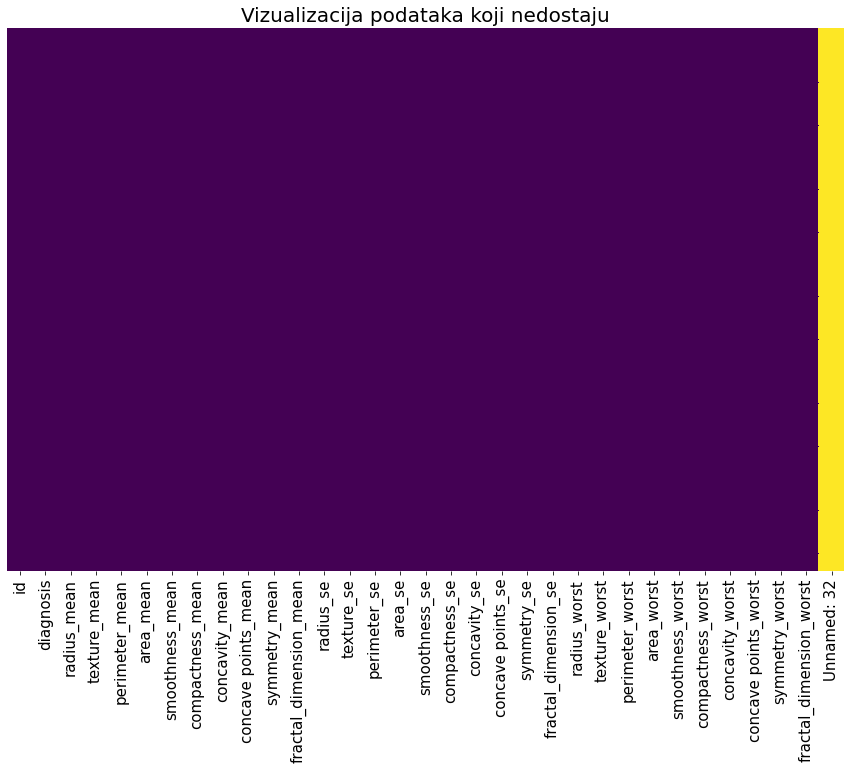

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Vizualizacija podataka koji nedostaju", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

Vidimo da su u zadnjem stupcu nedostajuće vrijednosti, pa njega izbacujemo:

In [ ]:
data = data.drop(['Unnamed: 32','id'],axis = 1)

Ponovna provjera:

In [ ]:
print("Broj podataka koji nedostaju")
print(30 * "-")
print(data.isna().sum())
print(30 * "-")
print("Ukupan broj podataka koji nedostaju:", data.isna().sum().sum())
print(30 * "-")

Broj podataka koji nedostaju
------------------------------
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
----------------------------

### Histogram srednje vrijednosti radijusa za benigne i maligne tumore

> **Countplot()** je funkcija u biblioteci seaborn koja se koristi za stvaranje stupčastog grafikona brojanja za kategoričku varijablu. Sličan je histogramu, ali umjesto da prikazuje učestalost vrijednosti unutar neprekidnog numeričkog intervala, prikazuje učestalost vrijednosti unutar kategoričkog intervala. X-os dijagrama prikazuje jedinstvene vrijednosti kategoričke varijable, a y-os pokazuje broj opažanja za svaku vrijednost.

Funkcija countplot() uzima nekoliko parametara, uključujući podatke koje želimo iscrtati, varijablu osi x i varijablu osi y. Osim toga, prihvaća širok raspon opcija prilagodbe kao što su boja traka, stil traka i oznake na x i y osi.

Na primjer, u ovom slučaju koristile smo sns.countplot(data.diagnosis) za iscrtavanje broja opažanja za svaku jedinstvenu vrijednost u stupcu 'diagnosis' okvira podataka 'data'.

To je dobra metoda vizualizacije kada želite razumjeti distribuciju kategoričke varijable u svom skupu podataka i brzo identificirati najčešće vrijednosti.

Broj benignih:  357
Broj malignih:  212


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


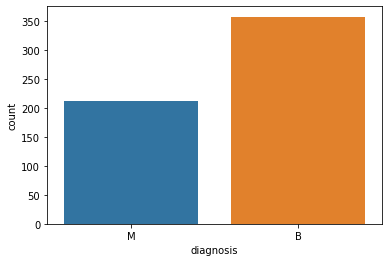

In [ ]:
ax = sns.countplot(data.diagnosis,label="Count")       # M = 212, B = 357
B, M = data.diagnosis.value_counts()
print('Broj benignih: ',B)
print('Broj malignih: ',M)

> **Histogram** je grafički prikaz distribucije skupa podataka koji koristimo za prikaz neprekidnih slučajnih podataka. To je procjena distribucije vjerojatnosti kontinuirane varijable. Za konstruiranje histograma, prvi korak je raspodjela raspona vrijednosti, to jest, dijeljenje cijelog raspona vrijednosti u niz intervala, a zatim brojanje koliko vrijednosti pada u svaki interval. Razredi se obično specificiraju kao uzastopni intervali varijable koji se ne preklapaju. Razredi (intervali) moraju biti susjedni i često su (ali ne nužno) iste veličine.

Histogram je koristan alat za vizualizaciju distribucije skupa podataka, kao i identificiranje uzoraka i odstupanja u podacima. Oblik histograma može otkriti informacije o temeljnoj distribuciji podataka, primjerice je li simetričan ili iskrivljen. Visina stupaca u histogramu predstavlja učestalost promatranja unutar svakog razreda, a površina svakog stupca proporcionalna je broju promatranja u tom intervalu.

U Pythonu možemo koristiti funkciju matplotlib.pyplot.hist() ili funkciju seaborn.histplot() za izradu histograma. Također, može se koristiti i metoda pandas.DataFrame.plot.hist() za stvaranje histograma stupaca DataFramea.

> U statistici, **srednja vrijednost** je mjera središnje tendencije koja predstavlja prosječnu vrijednost skupa podataka. Izračunava se zbrajanjem svih opažanja u skupu podataka i dijeljenjem s ukupnim brojem opažanja.

Za skup podataka od n opažanja, srednja vrijednost (također, poznata kao aritmetička sredina ili jednostavno prosjek) predstavljena je grčkim slovom µ i definirana je kao:

µ = (x1 + x2 + x3 + … + xn) / n

gdje su x1, x2, x3, …, xn opažanja u skupu podataka, a n ukupan broj opažanja.

Srednja vrijednost je često korištena mjera središnje tendencije jer ju je lako razumjeti i izračunati. Međutim, na njega mogu utjecati ekstremne vrijednosti i ne mora uvijek biti najbolja mjera središnje tendencije za skup podataka. Druge mjere središnje tendencije uključuju medijan i mod.

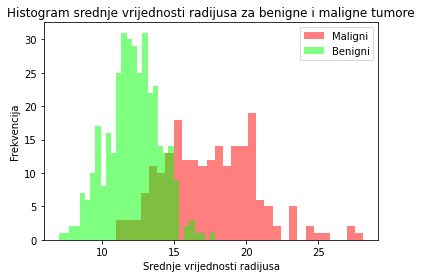

Najčešća maligna sredina radijusa je:  20.101999999999997


In [ ]:
maligni = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Maligni")
benigni = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Benigni")
plt.legend()
plt.xlabel("Srednje vrijednosti radijusa")
plt.ylabel("Frekvencija")
plt.title("Histogram srednje vrijednosti radijusa za benigne i maligne tumore")
plt.show()
frequent_malignant_radius_mean = maligni[0].max()
index_frequent_malignant_radius_mean = list(maligni[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = maligni[1][index_frequent_malignant_radius_mean]
print("Najčešća maligna sredina radijusa je: ",most_frequent_malignant_radius_mean)

frequent_ben_radius_mean = benigni[0].max()
index_frequent_ben_radius_mean = list(benigni[0]).index(frequent_ben_radius_mean)
most_frequent_ben_radius_mean = maligni[1][index_frequent_ben_radius_mean]
print("Najčešća benigna sredina radijusa je: ",most_frequent_ben_radius_mean)

Zaključak: <br>Iz grafikona vidimo da je prosjek radijusa malignih tumora uglavnom veći od prosjeka radijusa benignih tumora.
Benigna distribucija (zelena na grafikonu) je približno zvonolika, što je oblik normalne distribucije (Gaussova distribucija)

**Gaussova distribucija**, također poznata kao normalna distribucija ili zvonasta krivulja, je distribucija vjerojatnosti koja opisuje distribuciju mnogih kontinuiranih varijabli u prirodi. Definiraju ga dva parametra: srednja vrijednost (μ) i standardna devijacija (σ). Srednja vrijednost predstavlja središte distribucije, a standardna devijacija predstavlja širenje distribucije.

Graf funkcije tvori krivulju u obliku zvona, sa srednjom (μ) na vrhu krivulje i standardnom devijacijom (σ) koja kontrolira širinu krivulje. Krivulja je simetrična oko srednje vrijednosti, a ukupna površina ispod krivulje jednaka je 1.

Gaussova distribucija koristi se u mnogim područjima kao što su statistika, financije, fizika, inženjerstvo i mnogim drugim. Obično se koristi za modeliranje buke i pogrešaka. Gaussova distribucija također, temelj je mnogih statističkih testova i modela, kao što su t-test i linearna regresija.

Kada je distribucija slična Gaussovoj (normalnoj) distribuciji, to znači da je oblik distribucije u obliku zvona i simetričan oko srednje vrijednosti, s većinom promatranja koncentriranim u sredini i sve manjim promatranjem kako se udaljavate od središta .

Kada je distribucija slična Gaussovoj, to znači da podaci slijede normalan obrazac, pri čemu je većina opažanja blizu srednje vrijednosti, a broj opažanja se smanjuje kako se udaljavate od srednje vrijednosti. Također, to znači da podaci nisu iskrivljeni ulijevo ili udesno i da nemaju odstupanja.
To implicira da se podaci dobro ponašaju i da se mogu modelirati pomoću Gaussove distribucije, što znači da se mogu primijeniti mnoge statističke metode i modeli koji se temelje na Gaussovoj distribuciji.
Međutim, vrijedno je napomenuti da distribucija može biti slična Gaussovoj distribuciji čak i ako nije potpuno ista. Mogao bi imati drugačiju srednju vrijednost ili standardnu ​​devijaciju, ili bi repovi mogli biti teži ili lakši. U tim se slučajevima kaže da je distribucija približno normalna ili da ima normalni oblik, kao što je u našem slučaju.

### Ekstremne vrijednosti (Outliers)

> **Ekstremne vrijednosti (Outlieri)** su opažanja koja su daleko izvan raspona većine podataka i mogu imati značajan utjecaj na rezultate statističkih analiza i modela strojnog učenja. U znanstvenom programiranju, outlieri mogu biti uzrokovani nizom čimbenika kao što su pogreške mjerenja, pogreške u unosu podataka ili prirodna varijabilnost podataka.

Outlieri mogu imati negativan učinak na izvedbu modela strojnog učenja pristranom modela prema outlierima i čineći ga manje robusnim za nove podatke. Također, mogu iskriviti rezultate statističkih analiza, što dovodi do netočnih zaključaka. Stoga je u znanstvenom programiranju važno identificirati i rukovati ekstremnim vrijednostima.

Postoji nekoliko metoda za identificiranje outliera u znanstvenom programiranju, kao što je korištenje statističkih testova, tehnika vizualizacije ili korištenje algoritama strojnog učenja posebno dizajniranih za otkrivanje outliera. Neke uobičajene tehnike uključuju metodu Z-rezultata, Tukeyjevu metodu i Mahalanobisovu metodu udaljenosti.

Nakon što se identificiraju odstupanja, važno je odlučiti hoćemo li ih ukloniti ili ne. U nekim slučajevima može biti prikladno ukloniti outliere, ali u drugim slučajevima može biti važno zadržati ih u skupu podataka. Odluka o uklanjanju outliera ovisit će o specifičnom kontekstu i istraživačkom pitanju.

Ako se outlieri uklone, važno je dokumentirati proces i razlog zašto su uklonjeni jer bi to moglo utjecati na zaključke i tumačenje rezultata.

> U statistici, kvartil je vrsta kvantila koji skup podataka dijeli na četiri jednaka dijela. Prvi kvartil (Q1) jednak je 25. percentilu i odvaja najnižih 25% podataka od ostalih. Drugi kvartil (Q2) jednak je medijanu i odvaja srednjih 50% podataka od gornjih i donjih 25%. Treći kvartil (Q3) jednak je 75. percentilu i odvaja najviših 25% podataka od ostalih.

U znanstvenom programiranju, kvantili se mogu izračunati pomoću različitih biblioteka kao što su numpy, pandas i scipy. Specifične funkcije i metode koje se koriste za izračunavanje kvantila ovisit će o biblioteci i programskom jeziku koji se koristi.

U prethodnom histogramu vidimo da postoje rijetke vrijednosti u distribuciji benignih tumora. <br>
Vrijednosti mogu biti pogreške ili rijetki događaji koje nazivamo ekstremima. <br>


Izračunavanje odstupanja: <br>
- izračunamo prvi kvartil (Q1)(25%)
- pronađemo IQR (raspon među kvartilima) = Q3-Q1
- izračunamo Q1 - 1.5IQR i Q3 + 1.5IQR <br>

Sve izvan ovog raspona predstavlja ekstremne vrijednosti.


In [ ]:
data_benign = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_benign.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Sve izvan ovog raspona predstavlja ekstremne vrijednosti: (", lower_bound ,",", upper_bound,")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

Sve izvan ovog raspona predstavlja ekstremne vrijednosti: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


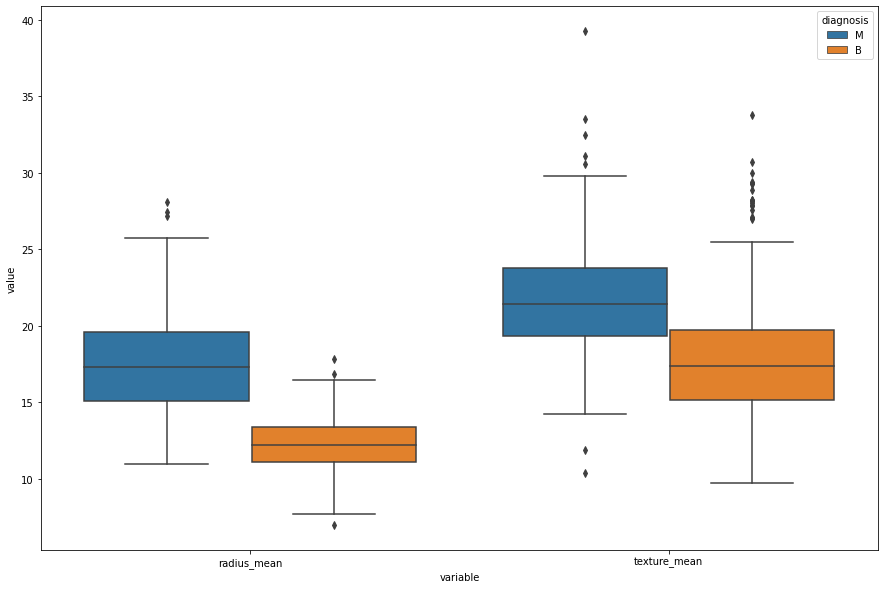

In [ ]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

Zaključak: Vidimo da ekstremne vrijednosti koje smo dobili nisu prevelika odstupanja od naših podataka, tako da ih nećemo izbaciti. 

### Srednja vrijednost, varijanca, standardna devijacija

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
print("mean: ",data_benign.radius_mean.mean())
print("variance: ",data_benign.radius_mean.var())
print("standart deviation (std): ",data_benign.radius_mean.std())
print("describe method: ",data_benign.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
standart deviation (std):  1.7805116461410393
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


In [ ]:
print("mean: ", data_malignant.radius_mean.mean())
print("variance: ",data_malignant.radius_mean.var())
print("standart deviation (std): ",data_malignant.radius_mean.std())
print("describe method: ",data_malignant.radius_mean.describe())

mean:  17.462830188679245
variance:  10.26543081462935
standart deviation (std):  3.203971100779367
describe method:  count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64


### Odnosi među varijablama

**Dijagram raspršenosti** (Scatter plot) je grafički prikaz odnosa između dviju varijabli. To je dijagram koji prikazuje vrijednosti dviju varijabli na dvije osi, s točkom ili markerom postavljenim na točku na grafikonu koja odgovara vrijednostima dviju varijabli za danu podatkovnu točku. Točke na dijagramu raspršenosti mogu se koristiti za vizualnu identifikaciju obrazaca i trendova u podacima, kao što su pozitivna ili negativna korelacija, linearni ili nelinearni odnos.

U dijagramu raspršenosti, ako su točkice uglavnom na dijagonalnoj liniji od donjeg lijevog do gornjeg desnog, to sugerira pozitivnu korelaciju između dviju varijabli, što znači da kako jedna varijabla raste, druga varijabla također ima tendenciju povećanja. Ako su točkice uglavnom na dijagonalnoj liniji od gornjeg lijevog do donjeg desnog, to sugerira negativnu korelaciju, što znači da kako jedna varijabla raste, druga varijabla teži smanjenju. Ako su točkice nasumično razbacane, to ne znači da postoji korelacija.

Općenito, dijagrami raspršenosti koristan su alat za istraživačku analizu podataka i mogu pomoći u identificiranju odnosa između varijabli, ekstremnih vrijednosti i potencijalnih pogrešaka podataka.

Možemo reći da su dvije varijable povezane jedna s drugom, ako jedna od njih daje informacije o drugima
- Na primjer, ako idemo na velike udaljenosti taksijem, platit ćemo više pa možemo reći da su cijena i udaljenost međusobno pozitivno povezane.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

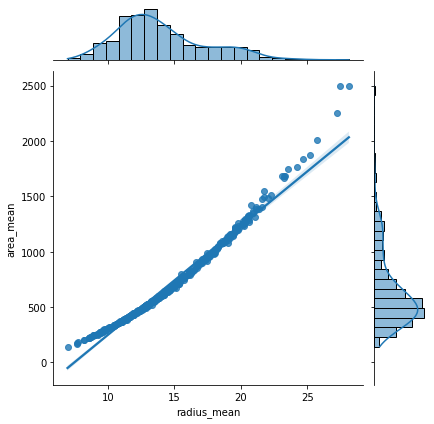

In [ ]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="reg")
plt.show()

Vizualizacija višedimenzionalnih odnosa:

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


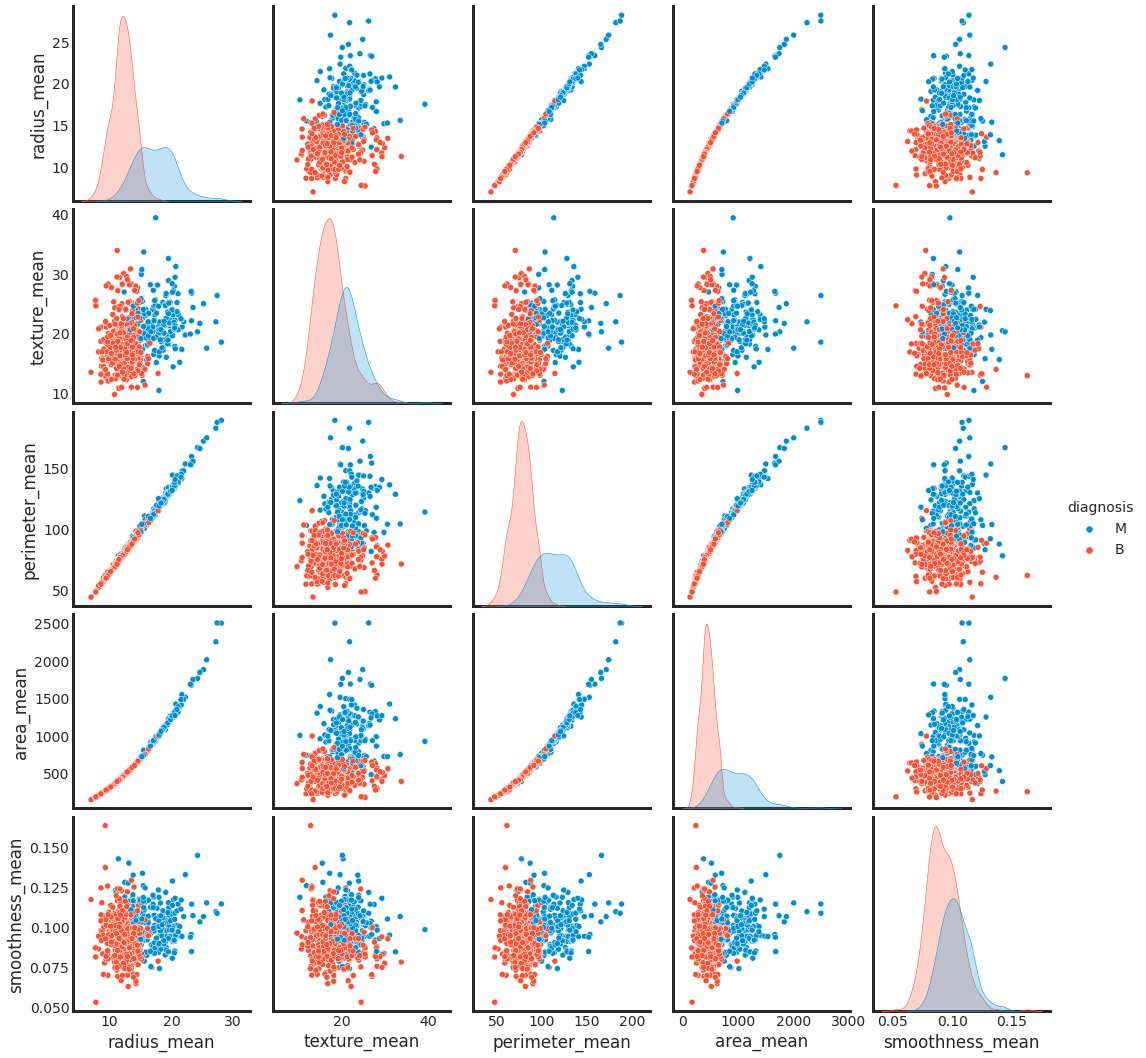

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]], hue = 'diagnosis' , size=3)

Zaključak: Pogledajmo odnos između srednje vrijednosti radijusa (radius_mean) i srednje vrijednosti površine (area_mean)
- U dijagramu raspršenosti možemo vidjeti da se povećanjem srednje vrijednosti radijusa povećava i srednja vrijednost površine. Stoga su međusobno u pozitivnoj korelaciji.
- Ne postoji korelacija između srednje površine (area_mean) i fraktalne dimenzije se (fractal_dimension_s)e. Budući da kada se srednja vrijednost površine promijeni, slučajnost srednje vrijednosti površine ne utječe na fraktalnu dimenziju se.

### Matrica korelacije

Matrica korelacije je tablica koja prikazuje koeficijente korelacije između više varijabli. Svaka ćelija u matrici sadrži koeficijent korelacije (r) između dvije varijable. Koeficijent korelacije mjeri snagu i smjer linearnog odnosa između dviju varijabli. Vrijednost koeficijenta korelacije kreće se od -1 do 1, gdje -1 označava savršen negativan linearni odnos, 1 označava savršen pozitivan linearni odnos, a 0 označava nepostojanje linearnog odnosa.

Dijagonala matrice je uvijek 1, jer je svaka varijabla u savršenoj korelaciji sama sa sobom. Korelacijska matrica može biti simetrična ili asimetrična ovisno o podacima i metodi koja se koristi za izračun korelacije.

U većini slučajeva korelacijska matrica koristi se za identificiranje obrazaca i trendova u podacima, kao što su pozitivna ili negativna korelacija, linearni ili nelinearni odnos, te za odabir varijabli za daljnju analizu.

Pogledajmo korelaciju između svih značajki u našem datasetu.

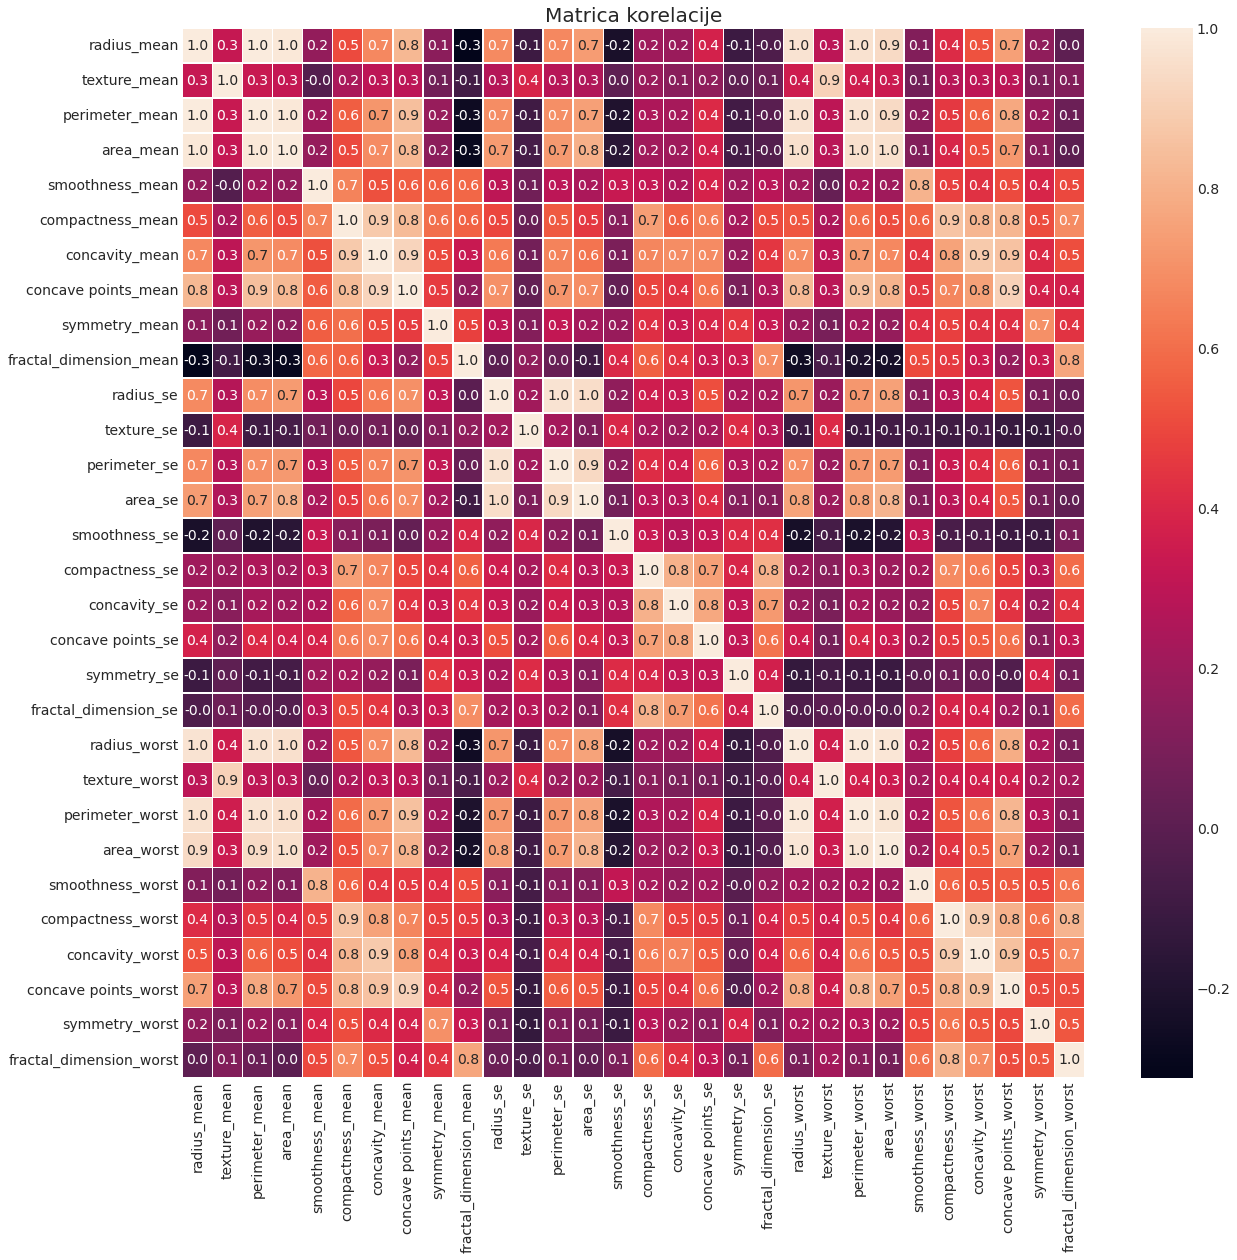

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Matrica korelacije')
plt.savefig('graph.png')
plt.show()

Raspon brojeva u matrici je od -1 do 1.

- Broj 1 znači da su dvije varijable u pozitivnoj korelaciji jedna s drugom poput srednje vrijednosti radijusa (radius_mean) i srednje vrijednosti površine (area_mean)

- Broj 0 nam govori da nema korelacije između varijabli kao što je srednja vrijednost radijusa (radius_mean) i fraktalna dimenzija se (fractal_dimension_se)

- Broj -1 znači da su dvije varijable u negativnoj korelaciji jedna s drugom, kao što je srednja vrijednost radijusa (radius_mean) i srednja vrijednost fraktalne dimenzije (fractal_dimension_mean).
Korelacija između njih nije -1, ona je -0,3, ali ako je predznak korelacije negativan, to znači da postoji negativna korelacija.


Kao što se može vidjeti u tablici radius_mean, perimeter_mean i area_mean međusobno su u korelaciji. Compactness_mean, concavity_mean i concave points_mean međusobno su u korelaciji. Osim ovih, radius_se, perimeter_se i area_se su u korelaciji. Radius_worst, perimeter_worst i area_worst su također u korelaciji, kao i compactness_worst, concavity_worst i concave points_worst. Compactness_se, concavity_se i concave points_se su u korelaciji, texture_mean i texture_worst su u korelaciji i za kraj area_worst i area_mean su u korelaciji.

Matrica korelacije za značajke prikazane u vizualizaciji višedimenzionalnih odnosa:

Text(0.5, 0.98, 'Matrica korelacije')

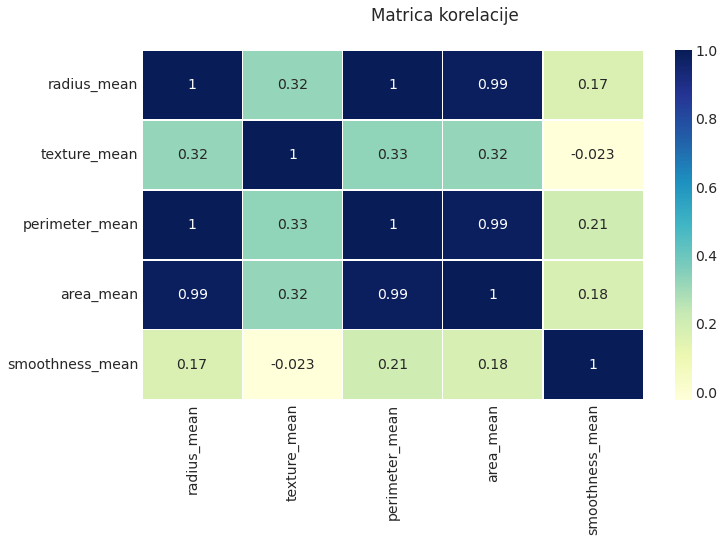

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Matrica korelacije')

### Priprema podataka

In [ ]:
df.diagnosis.unique()

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
dfM=data[data['diagnosis'] ==1]
dfB=data[data['diagnosis'] ==0]

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


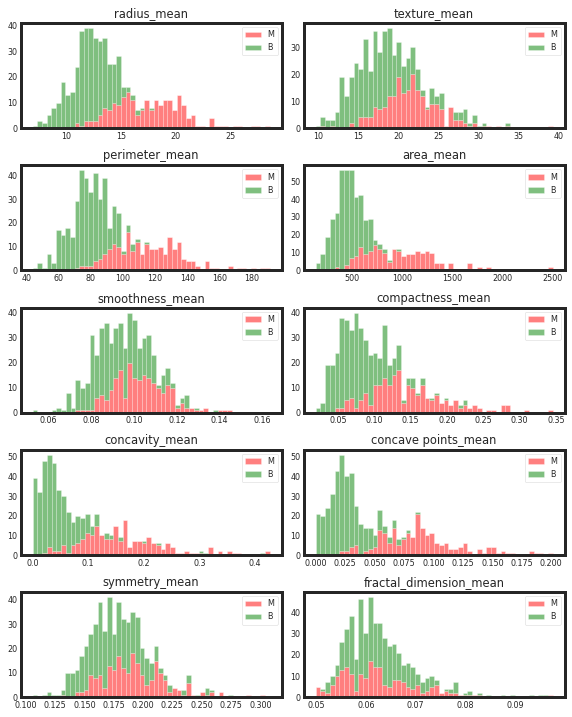

In [ ]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

Zaključak: 
*  Srednje vrijednosti radijusa stanice, perimetra, površine, kompaktnosti, konkavnosti i konkavnih točaka mogu se koristiti u klasifikaciji raka. Veće vrijednosti ovih parametara pokazuju korelaciju s malignim tumorima.
*  Srednje vrijednosti teksture, glatkoće, simetrije ili fraktalne dimenzije ne pokazuju osobitu prednost jedne dijagnoze nad drugom. Ni u jednom od histograma nema vidljivih velikih odstupanja koja zahtijevaju daljnje čišćenje.


### Train test split

In [ ]:
traindf, testdf = train_test_split(data, test_size = 0.3)

## Logistička regresija

**Logistička regresija** je statistička metoda koja se koristi za modeliranje odnosa između binarne zavisne varijable i jedne ili više nezavisnih varijabli. Model logističke regresije varijacija je modela linearne regresije koji se koristi kada je zavisna varijabla binarna (tj. poprima samo dvije vrijednosti kao što su 0 ili 1, točno ili netočno, da ili ne).

U logističkoj regresiji, odnos između nezavisnih varijabli i zavisne varijable modeliran je pomoću logističke funkcije (također poznate kao sigmoidna funkcija), koja proizvodi krivulju u obliku slova S. Logistička funkcija preslikava bilo koji realni broj u vrijednost između 0 i 1, koja se zatim može interpretirati kao vjerojatnost da je zavisna varijabla istinita ili pozitivna.

Cilj logističke regresije je pronaći najbolje parametre (koeficijente) za nezavisne varijable koje će maksimizirati vjerojatnost promatranih podataka, s obzirom na model. Nakon što se model uvježba, može se koristiti za izradu predviđanja o novim podacima, unosom novih vrijednosti za nezavisne varijable i korištenjem logističke funkcije za izračunavanje vjerojatnosti da je zavisna varijabla točna.

Logistička regresija naširoko se koristi u mnogim područjima kao što su medicinska istraživanja, društvene znanosti, marketing i financije. Može biti koristna za razumijevanje odnosa između binarnog ishoda i skupa prediktorskih varijabli, te za izradu predviđanja o vjerojatnosti događanja događaja.

In [ ]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  print(kf)
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

Logistička regresija ima široku primjenu kod klasifikacije diskretnih podataka (kao što je detaljnije objašnjeno), a u ovom slučaju koristit ćemo ju za binarnu (1,0) klasifikaciju.

Na temelju opažanja u dijagramima histograma, možemo razumno pretpostaviti da dijagnoza raka ovisi o srednjem polumjeru stanice, srednjem opsegu, srednjoj površini, srednjoj zbijenosti, srednjoj konkavnosti i srednjim konkavnim točkama. Zatim možemo izvesti logističku regresijsku analizu koristeći te značajke kako slijedi:

In [ ]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 88.945%
KFold(n_splits=5, random_state=None, shuffle=False)
Cross-Validation Score : 85.000%
Cross-Validation Score : 85.625%
Cross-Validation Score : 86.250%
Cross-Validation Score : 88.105%
Cross-Validation Score : 88.459%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
#model = LogisticRegression()
#classification_model(model, testdf,predictor_var,outcome_var)

In [ ]:
predictions = model.predict(testdf[predictor_var])
  
#Print accuracy
accuracy = metrics.accuracy_score(predictions,testdf[outcome_var])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 91.813%


## Random Forest

**Random Forest** je vrsta metode skupnog učenja u strojnom učenju i znanstvenom programiranju. To je proširenje algoritma stabla odlučivanja koje generira više stabala odlučivanja i kombinira ih kako bi proizvelo točnije i stabilnije predviđanje.

Osnovna ideja koja stoji iza Random Forest je uvježbavanje mnogih stabala odlučivanja na nasumičnim podskupovima podataka, a zatim prosjek (za regresiju) ili glasovanje (za klasifikaciju) predviđanja pojedinačnih stabala kako bi se proizvelo konačno predviđanje.

U Random Forestu, svako se stablo trenira na različitom slučajnom podskupu podataka, također poznatom kao početni uzorak, i slučajnom podskupu značajki. To dovodi do zbirke različitih stabala odlučivanja koja su manje sklona prekomjernom opremanju od jednog stabla odlučivanja. Random Forest također ima svojstvo važnosti značajke, koja se može koristiti za identifikaciju najvažnijih značajki podataka.

Random Forest je svestran algoritam koji se može koristiti za probleme klasifikacije i regresije, a poznato je da obrađuje velike skupove podataka visoke dimenzionalnosti i mješavinu kategoričkih i kontinuiranih varijabli. Također, otporan je na ekstremne vrijednosti i nedostajuće vrijednosti.

Random Forest implementiran je u mnoge knjižnice znanstvenog programiranja kao što su scikit-learn, R i Weka, a naširoko se koristi u područjima kao što su bioinformatika, financije i računalni vid.

Napravimo sada predviđanje pomoću Random Forest Classifiera za istih pet prediktora.

In [ ]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 93.216%
KFold(n_splits=5, random_state=None, shuffle=False)
Cross-Validation Score : 91.250%
Cross-Validation Score : 90.000%
Cross-Validation Score : 88.333%
Cross-Validation Score : 90.301%
Cross-Validation Score : 90.215%


In [ ]:
#model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
#classification_model(model, testdf,predictor_var,outcome_var)

In [ ]:
predictions = model.predict(testdf[predictor_var])
  
#Print accuracy
accuracy = metrics.accuracy_score(predictions,testdf[outcome_var])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 92.398%


Iz dobivenih točnosti modela možemo zaključiti kako Random Forest Classifier dalje bolje rezultate.

## Zaključak

### Usporedba Linearne i Logističke regresije

Linearna regresija i logistička regresija su statističke metode koje se koriste za modeliranje odnosa između varijabli, ali imaju neke ključne razlike:

*  Zavisna varijabla: Linearna regresija koristi se za modeliranje odnosa između kontinuirane zavisne varijable i jedne ili više nezavisnih varijabli, dok se logistička regresija koristi za modeliranje odnosa između binarne zavisne varijable (tj. preuzima samo dvije vrijednosti kao što su 0 ili 1, točno ili netočno, da ili ne) i jedna ili više nezavisnih varijabli.

*  Priroda odnosa: Linearna regresija modelira odnos između neovisnih i zavisnih varijabli kao linearna jednadžba, dok logistička regresija modelira odnos pomoću logističke funkcije (također poznate kao sigmoidna funkcija), koja proizvodi krivulju u obliku slova S.

*  Izlaz: Linearna regresija proizvodi kontinuirani izlaz, dok logistička regresija proizvodi vrijednost vjerojatnosti između 0 i 1, što se može protumačiti kao vjerojatnost da je zavisna varijabla točna.

*  Pretpostavke: Linearna regresija pretpostavlja da je odnos između neovisnih i zavisnih varijabli linearan i da su pogreške normalno raspoređene. Logistička regresija ne donosi nikakve pretpostavke o distribuciji pogrešaka i može se nositi s nelinearnim odnosima između varijabli.

Ukratko, linearna regresija koristi se za predviđanje kontinuiranog ishoda, dok se logistička regresija koristi za predviđanje binarnog ishoda. Dva modela koriste različite pristupe za modeliranje odnosa između varijabli i donose različite pretpostavke o podacima.

Logistička regresija obično se koristi umjesto linearne regresije kada je zavisna varijabla binarna (tj. poprima samo dvije vrijednosti kao što su 0 ili 1, točno ili netočno, da ili ne).

> Evo nekih specifičnih situacija u kojima bi logistička regresija bila prikladniji izbor od linearne regresije:

*  Predviđanje binarnog ishoda: Logistička regresija koristi se za predviđanje vjerojatnosti binarnog ishoda kao što je hoće li kupac obaviti kupnju ili ne, hoće li pacijent imati bolest ili ne, je li e-pošta spam ili ne.

*  Rukovanje nelinearnim odnosima: Logistička regresija može rukovati nelinearnim odnosima između neovisnih i zavisnih varijabli, dok linearna regresija pretpostavlja linearni odnos.

*  Rukovanje izvanrednim vrijednostima i ekstremnim vrijednostima: Linearna regresija je osjetljiva na vanjske vrijednosti i ekstremne vrijednosti u podacima, dok oni manje utječu na logističku regresiju.

*  Rukovanje multikolinearnošću: Logistička regresija može se nositi s multikolinearnošću (prisutnost korelacije između varijabli predviđanja) bolje od linearne regresije.

*  Rukovanje nenormalno distribuiranim pogreškama: Logistička regresija ne donosi nikakve pretpostavke o distribuciji pogrešaka, dok linearna regresija pretpostavlja da su pogreške normalno raspoređene.

Međutim, važno je napomenuti da izbor modela u konačnici ovisi o konkretnom problemu i podacima koji su pri ruci. Uvijek je dobra praksa provjeriti pretpostavke i ocijeniti izvedbu modela korištenjem odgovarajućih metrika procjene.

### Random Forest

Random Forest moćan je algoritam strojnog učenja koji se može koristiti u širokom rasponu aplikacija, od kojih neke uključuju:

*  Klasifikacija: Nasumična šuma može se koristiti za probleme binarne i višeklasne klasifikacije. Osobito je koristan kada se radi o neuravnoteženim skupovima podataka i skupovima podataka visoke dimenzije.

*  Regresija: Nasumična šuma također se može koristiti za probleme regresije, gdje je cilj predvidjeti kontinuirani ishod. Poznato je da se dobro nosi s nelinearnim odnosima i ekstremima.

*  Odabir značajki: Nasumična šuma može se koristiti za identificiranje najvažnijih značajki u podacima, što može biti korisno za odabir značajki i smanjenje dimenzionalnosti.

*  Rukovanje nedostajućim vrijednostima: Random Forest može rukovati nedostajućim vrijednostima u podacima, što je korisno kada se radi sa skupovima podataka koji imaju nedostajuće vrijednosti.

*  Rukovanje velikim skupovima podataka: Nasumična šuma učinkovita je za rukovanje velikim skupovima podataka visoke dimenzionalnosti, a poznato je da se dobro skalira s brojem opažanja i značajki.

*  Rukovanje mješavinom kategoričkih i kontinuiranih varijabli: Random Forest može rukovati skupovima podataka s mješavinom kategoričkih i kontinuiranih varijabli, što je korisno za mnoge skupove podataka iz stvarnog svijeta.

*  Rukovanje nelinearnim odnosima: Slučajna šuma je neparametarska metoda i može rukovati nelinearnim odnosima, što je korisno kada odnos između neovisnih i zavisnih varijabli nije poznat ili nije linearan.

*  Rukovanje prekomjernim prilagođavanjem: Nasumična šuma je manje sklona prekomjernom opremanju nego jedno stablo odlučivanja, što je korisno kada se radi sa skupovima podataka koji imaju visok stupanj šuma.

Sve u svemu, Random Forest je fleksibilan i robustan algoritam koji se može koristiti u širokom rasponu aplikacija, a posebno je koristan kada se radi sa složenim, visokodimenzionalnim skupovima podataka.

### Logistička regresija vs Slučajna šuma

Logistička regresija i slučajna šuma algoritmi su strojnog učenja koji se mogu koristiti za probleme klasifikacije, ali imaju neke ključne razlike:

*  Složenost modela: Logistička regresija je jednostavan i interpretabilan model, dok je Random Forest složeniji i manje interpretabilan model. Random Forest koristi zbirku stabala odluka za predviđanje, dok logistička regresija koristi jednu jednadžbu za predviđanje.

*  Rukovanje nelinearnim odnosima: Random Forest može rukovati nelinearnim odnosima između neovisnih i zavisnih varijabli, dok logistička regresija pretpostavlja linearni odnos.

*  Rukovanje kategoričkim varijablama: Random Forest može izravno rukovati kategoričkim varijablama, dok logistička regresija zahtijeva da se kategoričke varijable kodiraju u numeričke varijable prije nego što se model može primijeniti.

*  Rukovanje nedostajućim vrijednostima: Oba algoritma mogu rukovati nedostajućim vrijednostima, ali je slučajna šuma manje osjetljiva na nedostajuće vrijednosti od logističke regresije.

*  Važnost značajke: Nasumična šuma može pružiti informacije o važnosti značajke, koje mogu biti korisne za odabir značajke i smanjenje dimenzionalnosti. Logistička regresija ne daje informacije o važnosti obilježja.

*  Prekomjerno prilagođavanje: Nasumična šuma je manje sklona prekomjernom prilagođavanju nego logistička regresija jer trenira više stabala odlučivanja na nasumičnim podskupovima podataka, dok logistička regresija koristi jednu jednadžbu za modeliranje podataka.

*  Brzina: Logistička regresija je općenito brža za treniranje i predviđanje nego Random Forest, osobito kada je broj opažanja velik.

Ukratko, logistička regresija je jednostavan, interpretabilan i učinkovit algoritam koji je dobar za jednostavne linearne probleme i interpretabilnost. Random Forest je složeniji, robusniji i manje razumljiv algoritam koji je dobar za rukovanje nelinearnim problemima i visokodimenzionalnim skupovima podataka. Odabir algoritma u konačnici ovisi o konkretnom problemu i podacima koji su pri ruci.